<a href="https://colab.research.google.com/github/Saharuth/MachineLearning/blob/main/simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'seaborn version: {sns.__version__}')

pandas version: 1.5.3
numpy version: 1.23.5
seaborn version: 0.12.2


In [ ]:
url = 'https://github.com/Saharuth/MachineLearning/raw/main/big%20mac.csv'
df = pd.read_csv(url, parse_dates=['date'])
df.head()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1386 entries, 0 to 1385
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1386 non-null   datetime64[ns]
 1   iso_a3         1386 non-null   object        
 2   currency_code  1386 non-null   object        
 3   name           1386 non-null   object        
 4   local_price    1386 non-null   float64       
 5   dollar_ex      1386 non-null   float64       
 6   dollar_price   1386 non-null   float64       
 7   USD_raw        1386 non-null   float64       
 8   EUR_raw        1386 non-null   float64       
 9   GBP_raw        1386 non-null   float64       
 10  JPY_raw        1386 non-null   float64       
 11  CNY_raw        1386 non-null   float64       
 12  GDP_dollar     702 non-null    float64       
 13  adj_price      702 non-null    float64       
 14  USD_adjusted   702 non-null    float64       
 15  EUR_adjusted   702 no

In [ ]:
# กรองข้อมูล เฉพาะ ปี 2019 และเดือนมกราคม
df = df[(df['date'].dt.year == 2019) & (df['date'].dt.month == 1) & (df['GDP_dollar'].notnull())]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,USD_raw,EUR_raw,GBP_raw,JPY_raw,CNY_raw,GDP_dollar,adj_price,USD_adjusted,EUR_adjusted,GBP_adjusted,JPY_adjusted,CNY_adjusted
1163,2019-01-01,ARG,ARS,Argentina,75.00,37.45500,2.002403,-0.64115,-0.56862,-0.50837,-0.44323,-0.34374,14462.920,3.165211,-0.419,-0.434,-0.338,-0.261,-0.396
1164,2019-01-01,AUS,AUD,Australia,6.10,1.40164,4.352045,-0.22006,-0.06244,0.06851,0.21009,0.42633,55692.730,4.945273,-0.192,-0.213,-0.080,0.028,-0.160
1167,2019-01-01,BRA,BRL,Brazil,16.90,3.71795,4.545516,-0.18539,-0.02077,0.11601,0.26389,0.48973,9895.765,2.968028,0.406,0.370,0.601,0.789,0.463
1168,2019-01-01,CAN,CAD,Canada,6.77,1.33140,5.084873,-0.08873,0.09543,0.24844,0.41386,0.66650,45094.605,4.487708,0.040,0.013,0.185,0.323,0.082
1169,2019-01-01,CHE,CHF,Switzerland,6.50,0.98165,6.621505,0.18665,0.42646,0.62571,0.84112,1.17011,80637.381,6.022237,0.009,-0.017,0.150,0.284,0.050


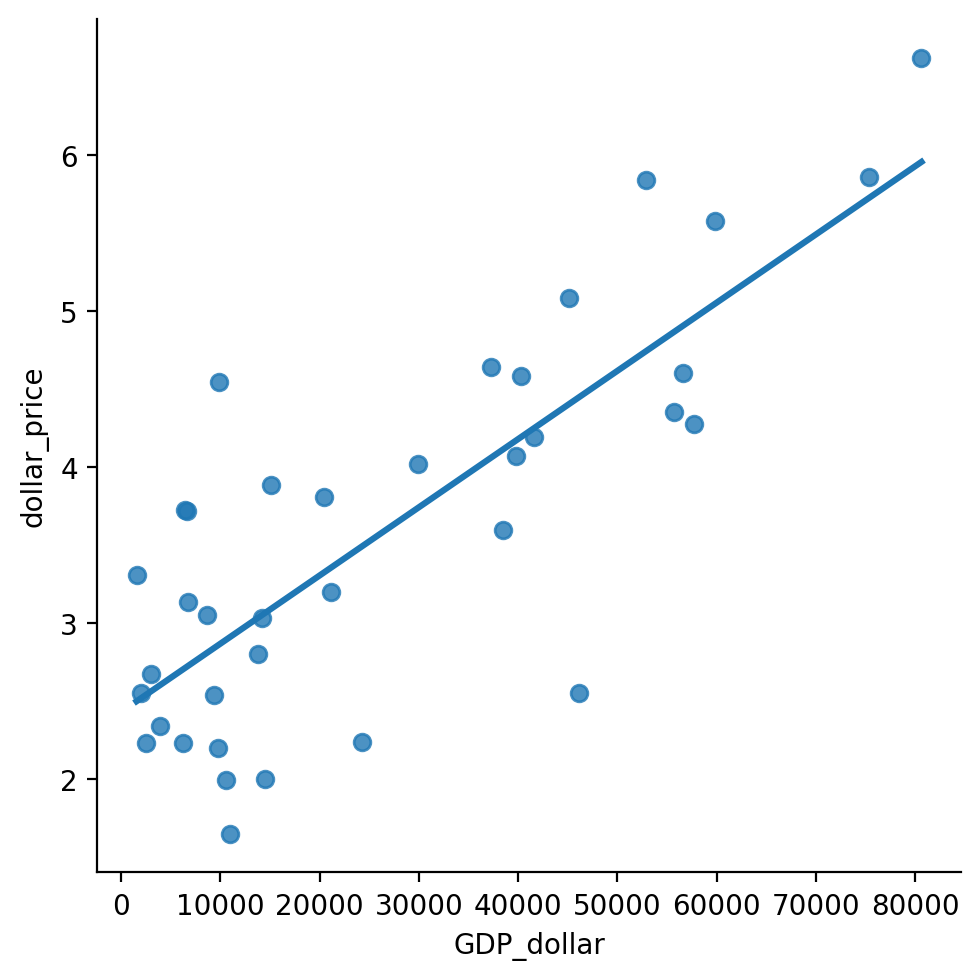

In [ ]:
sns.lmplot(x='GDP_dollar', y='dollar_price', data=df, ci=None)

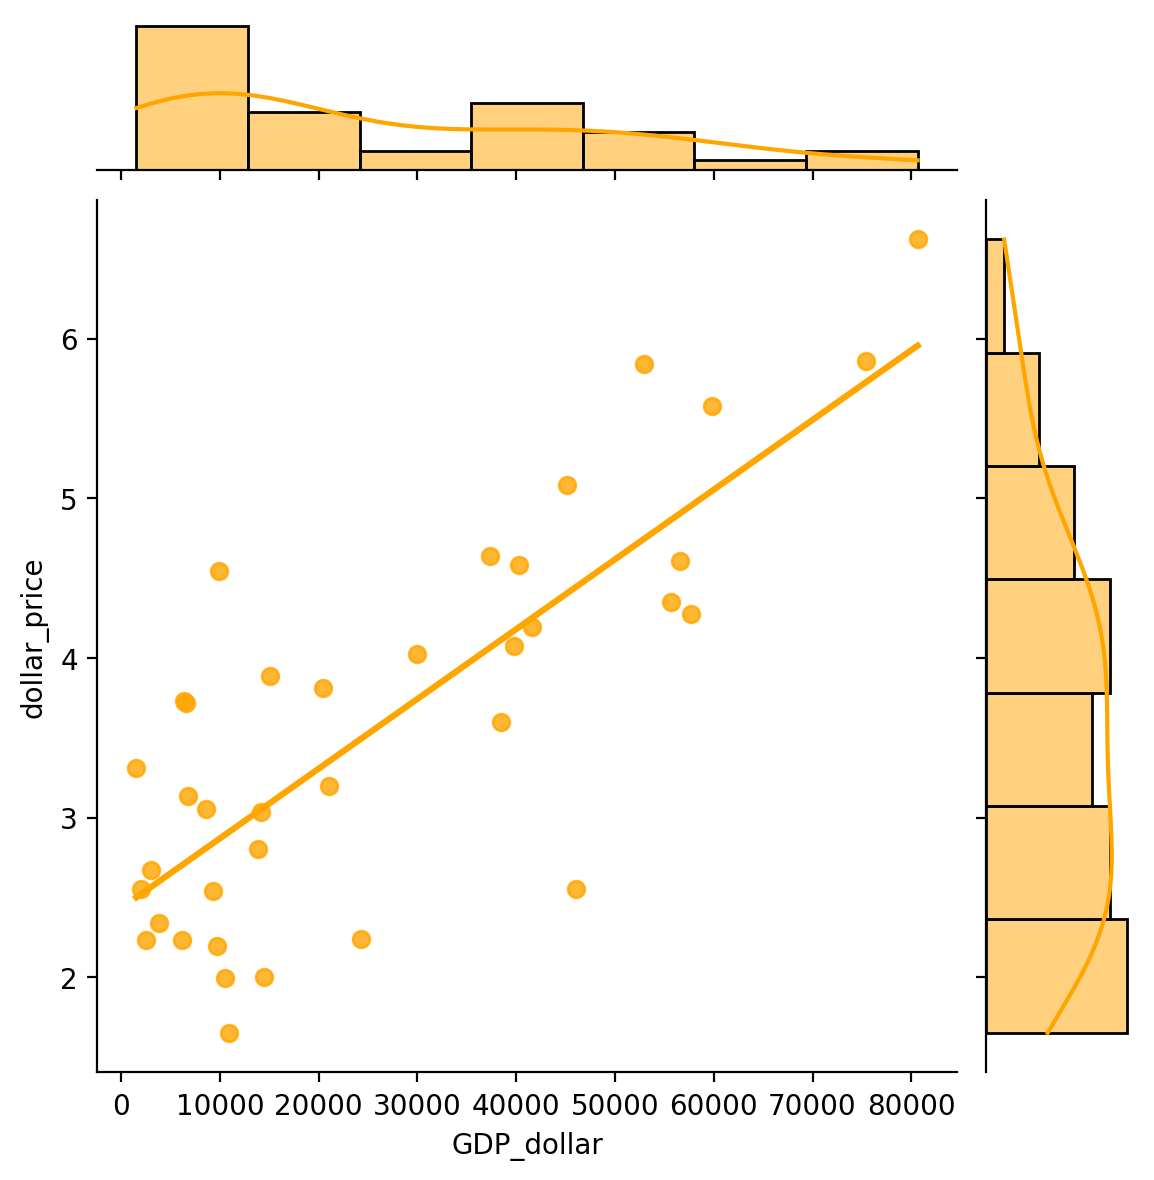

In [ ]:
sns.jointplot(x='GDP_dollar', y='dollar_price', data=df, kind='reg', ci=None, color='orange');

**SKLearn: LinearRegression**

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
print(f'sklearn version: {sklearn.__version__}')

sklearn version: 1.2.2


In [ ]:
model = LinearRegression()
print(model)

LinearRegression()


In [ ]:
X = df[['GDP_dollar']] # ทำให้ส่งค่าเป็นแบบ dataframe => Array 2 มิติ
y = df.dollar_price # ทำให้ส่งค่าเป็นแบบ series => 1 มิติ
print(X, y)

In [ ]:
model.fit(X, y) # X ต้องเป็น Array 2D ส่วน y ต้องเป็น Array 1D

In [ ]:
model.score(X, y) # R-squared

0.6312750690042255

In [ ]:
model.intercept_

2.432727161471293

In [ ]:
model.coef_

***y = α + βx***

In [ ]:
model.intercept_ + model.coef_ * 9000

array([2.82599241])

In [ ]:
model.predict([[9000]]) # สิ่งที่สามารถผ่านค่าเข้าไปต้องเป็น Array 2D

In [ ]:
model.predict([ [9000],
                [40000] ])

predict ด้วยข้อมูลจาก numpy

In [ ]:
np.arange(5000, 50001, 2500) # 1D

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [ ]:
np.arange(5000, 50001, 2500).reshape(-1, 1) # 2D

In [ ]:
model.predict(np.arange(5000, 50001, 2500).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.65120785, 2.7604482 , 2.86968854, 2.97892889, 3.08816924,
       3.19740958, 3.30664993, 3.41589027, 3.52513062, 3.63437096,
       3.74361131, 3.85285166, 3.962092  , 4.07133235, 4.18057269,
       4.28981304, 4.39905338, 4.50829373, 4.61753407])

In [ ]:
np.linspace(5000, 50000, 20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [ ]:
np.linspace(5000, 50000, 20).reshape(-1, 1)

array([[ 5000.        ],
       [ 7368.42105263],
       [ 9736.84210526],
       [12105.26315789],
       [14473.68421053],
       [16842.10526316],
       [19210.52631579],
       [21578.94736842],
       [23947.36842105],
       [26315.78947368],
       [28684.21052632],
       [31052.63157895],
       [33421.05263158],
       [35789.47368421],
       [38157.89473684],
       [40526.31578947],
       [42894.73684211],
       [45263.15789474],
       [47631.57894737],
       [50000.        ]])

In [ ]:
model.predict(np.linspace(5000, 50000, 20).reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

In [ ]:
s = pd.Series(np.linspace(5000, 50000, 20))
s

In [ ]:
model.predict(s.to_frame())

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

In [ ]:
dx = pd.DataFrame(np.linspace(5000, 50000, 20), columns=['GDP_dollar'])
dx

,GDP_dollar
0,5000.000000
1,7368.421053
2,9736.842105
3,12105.263158
4,14473.684211
5,16842.105263
6,19210.526316
7,21578.947368
8,23947.368421
9,26315.789474


In [ ]:
model.predict(dx)

array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

## Statsmodels: Simple Linear regression

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# formula: response ~ predictor1 + predictor2
model_a = smf.ols(formula='dollar_price ~ GDP_dollar', data=df).fit()

In [ ]:
model_a.summary()

In [ ]:
print(model_a.summary())

In [ ]:
model_a.pvalues

In [ ]:
model.intercept_ # sklearn

In [ ]:
model.coef_

In [ ]:
print(f'{model.coef_[0]:.7f}')

## train-test-split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
len(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3)

In [ ]:
model.fit(X_train, y_train) # step 2: fitting model

In [ ]:
model.score(X_test, y_test) # step 3: model scoring

In [ ]:
# step 4: predicting
model.predict([
    [10000],
    [20000],
    [25000]
]) # numpy array: X 2-dim array

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
model.intercept_ + model.coef_ * 9000

In [ ]:
model.predict([[9000]]) # 2D array

In [ ]:
model.predict([[9000],
               [40000]])

In [ ]:
np.arange(5000, 50001, 2500)

In [ ]:
np.arange(5000, 50001, 2500).reshape(-1, 1) # 2D

In [ ]:
model.predict(np.arange(5000, 50001, 2500).reshape(-1, 1))

In [ ]:
np.linspace(5000, 50000, 20)

In [ ]:
np.linspace(5000, 50000, 20).reshape(-1, 1)

In [ ]:
model.predict(np.linspace(5000, 50000, 20).reshape(-1, 1))

In [ ]:
s = pd.Series(np.linspace(5000, 50000, 20))
s

In [ ]:
model.predict(s.to_frame())

In [ ]:
dx = pd.DataFrame(np.linspace(5000, 50000, 20), columns=['gdp'])
dx

In [ ]:
model.predict(dx)